## What are Prompts in LangChain?
Prompts are templates or instructions fed to language models (LLMs) to guide their outputs. In LangChain, prompts are a core component for controlling LLM behavior, structuring queries, and ensuring consistent results.

### What are Prompts
Prompts are the input instructions or queries given to a model to guide its output.
```python 
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

load_dotenv()

model = ChatOpenAI(model='gpt-4', temperature=1.5, max_completion_tokens=10)
result = model.invoke("write a 5 line poemo on cricket")
print(result.content)
```

## static vs Dynamic Prompts

#### Static Prompts

- **Definition:**  
  Predefined, unchanging text templates used to query an LLM.
- **Example:**  
  `"Summarize the following article: {text}"`
- **Features:**  
  - Same structure every time  
  - No logic or conditional changes  
  - Easy to test, debug, and reuse  
- **Best for:**  
  - Simple, repetitive tasks  
  - Standardized instructions

#### Dynamic Prompts

- **Definition:**  
  Prompts generated or modified at runtime based on user input, context, or logic.
- **Example:**  
  A prompt that changes its wording, inserts custom instructions, or adds few-shot examples depending on the situation.
- **Features:**  
  - Adapts to context and user data  
  - Can include conditional logic or variable content  
  - Supports advanced prompt engineering (e.g., few-shot, chain-of-thought)
- **Best for:**  
  - Personalized responses  
  - Complex workflows  
  - Applications requiring flexible or contextual instructions

**Summary:**  
- Use **static prompts** for consistency and simplicity.
- Use **dynamic prompts** for flexibility, personalization, and advanced GenAI applications.
 
**Example:** <br>
Please summarize the research paper titled "(paper_input)" with the following specifications:
- Explanation style: {style_input}
- Explanation Length: {length_input}

1. Mathematical Details
   - Include relevant mathematical equations if present in the paper.
   - Explain the mathematical concepts using simple, intuitive code snippets where applicable.
   
2. Analogies
   - Use relatable analogies to simplify complex ideas.

If certain information is not available in the paper, respond with: “Insufficient information available.” 
Ensure the summary is clear, accurate, and aligned with the provided style and length.

## Prompt Template


**A PromptTemplate** in LangChain is a structured way to create prompts dynamically by inserting variables into a predefined template. Instead of hardcoding prompts, PromptTemplate allows you to define placeholders that can be filled in at runtime with different inputs.

This makes it reusable, flexible, and easy to manage, especially when working with dynamic user inputs or automated workflows.

### Why use PromptTemplate over f strings?

1. Default validation  
2. Reusable  
3. LangChain Ecosystem


#### What is a Prompt Template?

A **Prompt Template** in LangChain is a reusable text structure with placeholders (variables) that can be filled in at runtime. It helps you standardize and automate the way you interact with language models.

#### Key Features

- **Variables:** Define parts of the prompt that change dynamically (e.g., {topic}, {text}).
- **Reusability:** Use the same template for multiple queries or workflows.
- **Clarity:** Keeps your code organized and easier to maintain.

#### Example (Python)

```python
from langchain.prompts import PromptTemplate

prompt = PromptTemplate(
    input_variables=["language"],
    template="Write a hello world program in {language}."
)

print(prompt.format(language="Python"))
# Output: Write a hello world program in Python.
```


#### Why Use Prompt Templates?

- **Consistency:** Ensures prompts are always formatted the same way.
- **Flexibility:** Easily adapt to new tasks by changing variables.
- **Best Practices:** Encourages separation of prompt logic from business logic.

#### Learn More

- [LangChain Prompt Docs](https://python.langchain.com/docs/how_to/#prompt-templates)

## What are Messages in LangChain?

**Messages** refer to the individual exchanges that occur between a user and a language model (LLM) during a conversation. In LangChain, messages are structured objects that encapsulate user input, system instructions, and model responses.

#### Types of Messages

1. **HumanMessage:**  
   Represents user input or queries to the LLM.

2. **AIMessage:**  
   Represents the response generated by the LLM.

3. **SystemMessage:**  
   Used to set context or instructions for the LLM (e.g., "You are a helpful assistant").

4. **FunctionMessage:**  
   Represents calls to external tools or functions (advanced use).

#### Why Are Messages Important?

- **Conversation History:**  
  Messages enable LangChain to maintain context and continuity in multi-turn conversations.

- **Memory Management:**  
  Storing and retrieving past messages allows for stateful, context-aware chatbots.

- **Flexible Interactions:**  
  Allows mixing instructions, user queries, and model actions for complex workflows.


#### Example (Python)

```python
from langchain.schema import HumanMessage, AIMessage, SystemMessage

messages = [
    SystemMessage(content="You are a helpful assistant."),
    HumanMessage(content="What's the weather today?"),
    AIMessage(content="The weather is sunny and warm.")
]
```


#### Learn More

- [LangChain Message Types Docs](https://python.langchain.com/docs/concepts/prompt_templates/#messagesplaceholder)

## What are Chat Model Prompts?

**Chat model prompts** in LangChain are specialized prompts designed for conversational AI models (like OpenAI’s GPT-3.5/4 Chat, Anthropic’s Claude, etc.) that work with a sequence of "messages" rather than a single text input. Each message has a role (system, user, assistant) and content, enabling rich, multi-turn dialogues.

##### Key Features

- **Multi-message Structure:**  
  Prompts are built as a list of message objects (system, human, AI, function).
- **Role-based Context:**  
  Each message specifies its role, guiding the model’s behavior and response.
- **Context Management:**  
  Maintains conversation history for context-aware replies.
- **Supports Functions/Tools:**  
  Lets the LLM call external tools or APIs during a conversation.

##### Example (Python)

```python
from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate
)

chat_prompt = ChatPromptTemplate.from_messages([
    SystemMessagePromptTemplate.from_template("You are a helpful assistant."),
    HumanMessagePromptTemplate.from_template("{user_input}")
])

# Format the prompt with user input
messages = chat_prompt.format_messages(user_input="What is LangChain?")
```

#### Why Use Chat Model Prompts?

- Enable multi-turn, context-aware conversations
- Provide structured control over dialogue flow
- Support advanced use cases like tool use, memory, and function calling

#### Learn More

- [LangChain Chat Prompt Docs](https://python.langchain.com/docs/how_to/#prompt-templates)
- [OpenAI Chat API Docs](https://platform.openai.com/docs/guides/chat/introduction)

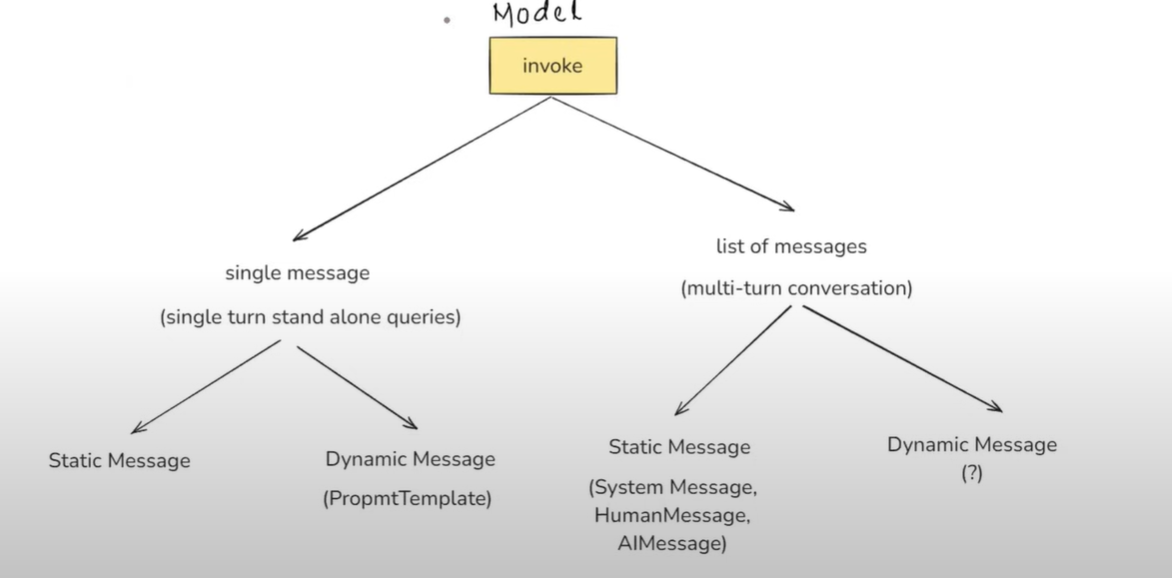

## Message Placeholder

A MessagesPlaceholder in `LangChain` is a special placeholder used inside a ChatPromptTemplate to dynamically insert chat history or a list of messages at runtime.

### What is a Message Placeholder in LangChain?

A **message placeholder** is a special construct used within chat model prompts in LangChain to represent a position where dynamic content—such as the current conversation history or user input—will be inserted at runtime.


#### Key Points

- **Usage:**  
  Message placeholders allow you to flexibly inject variable content (like previous messages, user context, or intermediate steps) into your chat prompt structure.

- **Common Example:**  
  Used with memory systems to insert the conversation history into a prompt for context-aware responses.

#### Example (Python)

```python
from langchain.prompts.chat import (
    ChatPromptTemplate,
    MessagesPlaceholder,
    HumanMessagePromptTemplate
)

chat_prompt = ChatPromptTemplate.from_messages([
    MessagesPlaceholder(variable_name="history"),
    HumanMessagePromptTemplate.from_template("{user_input}")
])
```
Here, `{history}` will be dynamically replaced by the full conversation history at runtime.

#### Why Use Message Placeholders?

- **Context Injection:**  
  Automatically includes relevant past messages for better, context-aware answers.
- **Cleaner Code:**  
  Separates prompt structure from dynamic content.
- **Improved Memory:**  
  Essential for multi-turn conversations and stateful chatbots.

## Learn More

- [LangChain Chat Prompts: Message Placeholders](https://python.langchain.com/docs/how_to/#prompt-templates)